<h3>Introduction</h3>

This note explores the relationship between the Fourier series and continuous Fourier transform and the possibility of approximating the solution to the Fourier series integral as a Fourier transform.

<h3>Gaussian Function</h3>
A shifted Gaussian function has the following definition
$$
f(x) = e^{- \alpha (x - \beta)^2}
$$

In [26]:
import scipy.integrate as si
import numpy as np
import matplotlib.pyplot as plt

70.0 -30.0 100


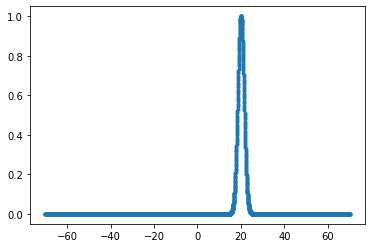

In [73]:
alpha = 1/4
beta = 20

L = 100
b = L/2 + beta
a = -b + 2*beta

#b = 15 + beta
#a = -b + 2*beta
#L = b - a
print(b, a, L)

Nx = 5000
x = np.linspace(-b, b, Nx)

def gauss(x):
    return np.exp(-alpha * (x - beta)**2)

plt.plot(x, gauss(x), '.')
plt.show()

<h3>Fourier Series</h3>

Let $f(x)$ be a **periodic function** of x, with period $L$. The *fundamental interval* is taken to be $(a , b)$, so $L = (b - a)$ and $f(x) = f(x+n L)$ for any integer $n$

The Fourier series coefficients, $f_n$, can be computed with
$$
f_n = \int_a^b dx f(x) e^{-2 \pi n i x / L}
$$
where $-\infty < n < \infty$. However, if $f(x)$ is real valued, then $\overline{f_n} = f_{-n}$, so only $0 \leq n < \infty$ must be computed ($-\infty < n < 0$ can be found by taking the complex conjugate).

In the real basis the above equation becomes
$$
f_m = \frac{L}{2} \left( a_m - i b_m \right) \quad \text{for}\ m \geq 0, \qquad f_{-m} = \frac{L}{2} \left( a_m + i b_m \right) \quad \text{for}\ m \geq 1
$$
where
$$
a_m = \frac{2}{L} \int_a^b dx f(x) \cos (2 \pi m x / L)
$$
$$
b_m = \frac{2}{L} \int_a^b dx f(x) \sin (2 \pi m x / L)
$$


(5000,)


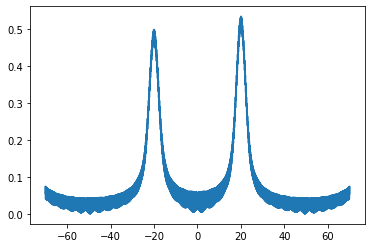

In [74]:
# determins how many harmonics are used
Nf = 600

fn = np.zeros(Nf, dtype=np.complex128)
for m in range(Nf):
    def amfn(x):
        return (2 / L) * gauss(x) * np.cos(2 * np.pi * m * x / L)
    def bmfn(x):
        return (2 / L) * gauss(x) * np.sin(2 * np.pi * m * x / L)

    am = si.quad(amfn, a, b)[0]
    bm = si.quad(bmfn, a, b)[0]
    
    fn[m] = (L / 2) * (am - 1j*bm)
    
recfn = np.zeros_like(x, dtype=np.complex128)
for n in range(-Nf+1, Nf):
    if n < 0:
        recfn += np.exp(2 * np.pi * 1j * n * x / L) * np.conj(fn[n])
    else:
        recfn += np.exp(2 * np.pi * 1j * n * x / L) * fn[n]
else:
    recfn *= (1/L)
                  
print(recfn.shape)

plt.plot(x, np.abs(recfn))
plt.show()


<h3>Fourier Transfrom</h3>

To transfrom from the Fourier seeries to the (continuous) Fourier
$$
a \rightarrow -\infty, \quad b \rightarrow \infty
$$
thus $L \rightarrow \infty$. Also, $2 \pi m / L \rightarrow k$, that is, we transfrom from discrete steps in $m$ to the continuous variable $k$. The result of this is the Fourier transfrom
$$
\widetilde{f}(k) = \int_{-\infty}^\infty dx e^{-i k x} f(x)
$$

**Fourier Transform of a Gaussian.**
Given a Gaussian function centerned at the origin, that is, $f(x) = e^{- \alpha x^2}$ the Fourier transform has the following result
$$
\widetilde{f}(k) = \sqrt{\frac{\pi}{\alpha}} e^{-k^2 / 4 \alpha}
$$

To find this result for a shifted Gaussian we start with
$$
\widetilde{f}(k) = \int_{-\infty}^\infty dz e^{-i k z} e^{- \alpha (z - \beta)^2}
$$
then we make the variable change $ x = z - \beta $, thus
$$
\widetilde{f}(k) = \int_{-\infty}^\infty dx e^{-i k (x + \beta)} e^{- \alpha x^2}
$$
which we rearrange as
$$
\widetilde{f}(k) = e^{-i k \beta} \int_{-\infty}^\infty dx e^{-i k x} e^{- \alpha x^2}
$$
So our final result is
$$
\widetilde{f}(k) = e^{-i k \beta} \sqrt{\frac{\pi}{\alpha}} e^{-k^2 / 4 \alpha}
$$

In [71]:
k = 2 * np.pi * np.arange(Nf) / L

fnapx = np.exp(-1j * k * beta) * np.sqrt(np.pi / alpha) * np.exp(-k**2 / (4*alpha))

#print(fnapx)

In [72]:
print(np.linalg.norm(fn - fnapx))
#print(fn - fnapx)
big = np.where((fn - fnapx) > 1e-15)
#print(fn[big] - fnapx[big])

7.641286782748377e-06
